c:\Users\NIKHITHA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\NIKHITHA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\NIKHITHA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\NIKHITHA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NIK

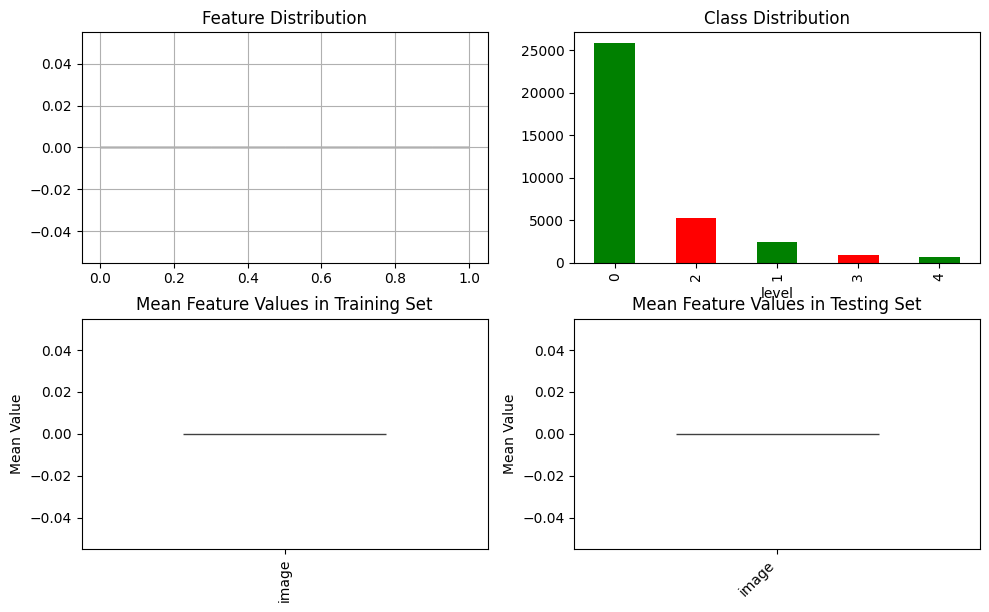

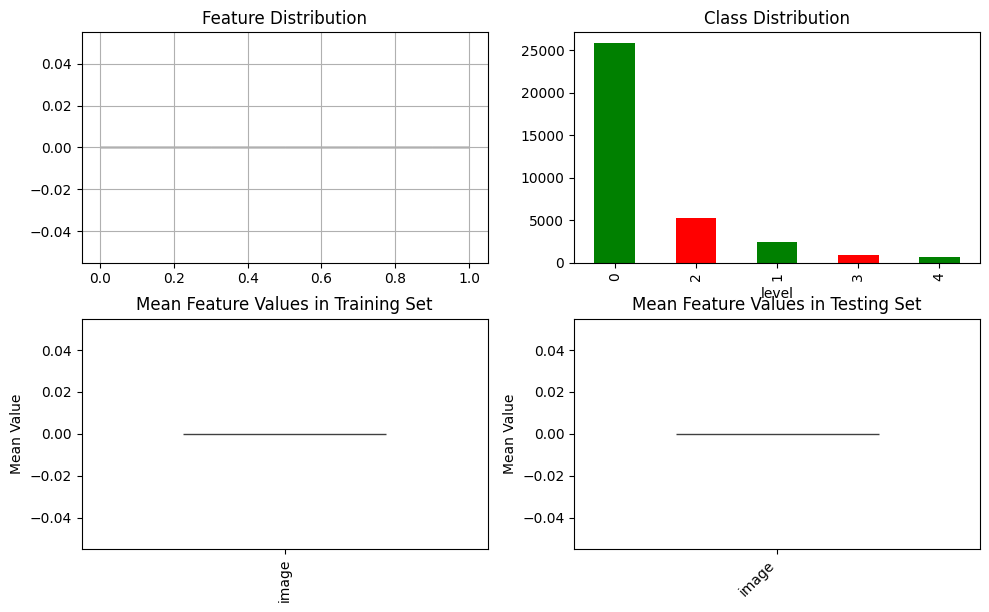

In [2]:
import tkinter as tk
from tkinter import filedialog, scrolledtext, messagebox, Toplevel, Frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Initialize Tkinter
root = tk.Tk()
root.title("Diabetic Retinopathy Classification")
root.geometry("1000x600")
root.configure(bg="#FAEBD7")

# Title Label with Border
title_label = tk.Label(
    root,
    text="Diabetic Retinopathy Classification",
    font=("Arial", 18, "bold"),
    bg="#8B0000",
    fg="white",
    relief="ridge",
    borderwidth=5,
    padx=10,
    pady=5
)
title_label.grid(row=0, column=0, columnspan=2, pady=15, padx=10, sticky="ew")

# Global Variables
dataset = None
X_train, X_test, y_train, y_test = None, None, None, None
model = None

# Frame for buttons with Padding
button_frame = Frame(root, bg="#FAEBD7", padx=20, pady=20)
button_frame.grid(row=1, column=1, padx=10, pady=10)

# Text area to display results
text_area = scrolledtext.ScrolledText(root, width=85, height=25, font=("Arial", 10), bg="white", relief="sunken", borderwidth=3)
text_area.grid(row=1, column=0, padx=20, pady=20)

def update_text(content):
    text_area.insert(tk.END, content + "\n\n")
    text_area.see(tk.END)

# Function to upload dataset
def upload_dataset():
    global dataset
    file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
    if file_path:
        try:
            dataset = pd.read_csv(file_path)
            update_text(f"Dataset Loaded Successfully!\n{dataset.head(10)}")
            update_text(f"Dataset Summary:\n{dataset.describe()}")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load dataset: {e}")

# Function to preprocess dataset
def preprocess_dataset():
    global dataset
    if dataset is None:
        messagebox.showerror("Error", "Please upload a dataset first!")
        return
    dataset = dataset.apply(pd.to_numeric, errors='coerce')
    dataset.fillna(dataset.mean(), inplace=True)
    scaler = StandardScaler()
    numeric_columns = dataset.select_dtypes(include=[np.number]).columns[:-1]
    dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
    update_text(f"Dataset Preprocessed: Missing values handled & normalized.\n{dataset.head(10)}")

# Function to split dataset
def split_dataset():
    global X_train, X_test, y_train, y_test
    if dataset is None:
        messagebox.showerror("Error", "Please preprocess the dataset first!")
        return
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    update_text(f"Dataset Split into Training and Testing sets.\nTraining Set Size: {X_train.shape[0]} samples\nTesting Set Size: {X_test.shape[0]} samples")

# Function to train ML model
def train_model():
    global model
    if X_train is None or y_train is None:
        messagebox.showerror("Error", "Please split the dataset first!")
        return
    model = RandomForestClassifier(n_estimators=10, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    update_text(f"RandomForest Model Trained Successfully!\nAccuracy: {accuracy:.2f}")
    update_text(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    update_text(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Function to predict class
def predict_class():
    if model is None:
        messagebox.showerror("Error", "Train the model first!")
        return
    predictions = model.predict(X_test[:5])
    actual_values = y_test[:5].values
    for i, (actual, pred) in enumerate(zip(actual_values, predictions)):
        update_text(f"Sample {i+1} - Actual: {actual}, Predicted: {pred}")

# Function to show data visualization
def show_graphs():
    if dataset is None:
        messagebox.showerror("Error", "Upload and preprocess dataset first!")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    dataset.iloc[:, :-1].hist(ax=axes[0, 0], bins=10, color='skyblue', edgecolor='black')
    axes[0, 0].set_title("Feature Distribution")
    dataset.iloc[:, -1].value_counts().plot(kind='bar', ax=axes[0, 1], color=['green', 'red'])
    axes[0, 1].set_title("Class Distribution")
    
    X_train.mean().plot(kind='bar', ax=axes[1, 0], color='blue', alpha=0.75, edgecolor='black')
    axes[1, 0].set_title("Mean Feature Values in Training Set")
    axes[1, 0].set_ylabel("Mean Value")
    
    X_test.mean().plot(kind='bar', ax=axes[1, 1], color='orange', alpha=0.75, edgecolor='black')
    axes[1, 1].set_title("Mean Feature Values in Testing Set")
    axes[1, 1].set_ylabel("Mean Value")
    
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    
    graph_window = Toplevel(root)
    graph_window.title("Data Visualizations")
    canvas = FigureCanvasTkAgg(fig, master=graph_window)
    canvas.draw()
    canvas.get_tk_widget().pack()

# Button Styling
button_styles = [
    ("Upload Dataset", upload_dataset, "#4682B4"),
    ("Preprocess Dataset", preprocess_dataset, "#32CD32"),
    ("Dataset Train & Test Split", split_dataset, "#FFD700"),
    ("Train the Model", train_model, "#FF4500"),
    ("Predict Class", predict_class, "#9932CC"),
    ("Show Graphs", show_graphs, "#8B008B"),
    ("Exit", root.destroy, "#DC143C")
]

for i, (text, command, color) in enumerate(button_styles):
    tk.Button(
        button_frame, text=text, command=command, width=30, font=("Arial", 10, "bold"),
        bg=color, fg="white", relief="raised", borderwidth=3
    ).grid(row=i, column=0, padx=10, pady=5)

# Run Tkinter loop
root.mainloop()